# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)
y_train_pd = pd.DataFrame(y_train)
y_test_pd = pd.DataFrame(y_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,229,86,41,64,148,61,5,150,45,19,138,165,333,173,80,5,8,182,185
1,44,119,54,106,220,65,12,213,31,24,167,223,675,232,66,20,1,192,202
2,251,104,58,103,230,69,11,219,30,25,176,231,716,246,71,7,4,187,196
3,26,83,36,54,119,57,6,128,53,18,125,143,238,139,82,6,3,179,183
4,243,101,55,108,228,69,12,215,31,24,168,229,684,214,71,2,16,188,199
5,467,96,54,104,175,58,10,215,31,24,175,221,682,222,75,13,23,186,194
6,844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195
7,13,89,42,85,144,58,10,152,44,19,144,173,345,161,72,8,13,187,197
8,208,86,46,70,149,65,8,149,45,19,146,170,331,185,77,6,6,183,188
9,85,110,58,106,180,51,6,261,26,28,171,278,998,257,83,9,13,181,182


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.774135,93.659381,44.825137,82.433515,168.693989,61.519126,8.526412,169.479053,40.792350,20.633880,147.806922,189.04918,442.863388,174.766849,72.608379,6.408015,12.850638,188.664845,195.402550
std,242.837146,8.401784,6.237281,15.753856,33.056206,7.461709,4.518588,33.375791,7.720284,2.626858,14.743521,30.90643,177.743545,32.627575,7.138975,5.044800,9.098182,6.080712,7.349964
min,2.000000,76.000000,34.000000,44.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,135.00000,194.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,221.000000,87.000000,40.000000,70.000000,142.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.00000,318.000000,149.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,418.000000,92.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.00000,363.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,639.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.00000,602.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,322.000000,133.000000,55.000000,265.000000,59.000000,29.000000,188.000000,288.00000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

from sklearn import datasets

import warnings
warnings.simplefilter('ignore')


%matplotlib inline

matplotlib.rcParams['figure.figsize'] = 11.7, 8.27

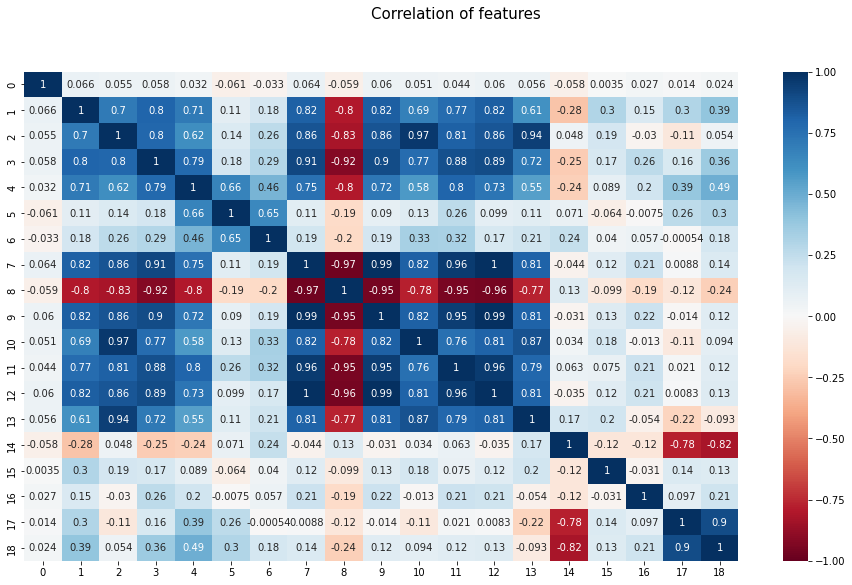

In [7]:
# Таблица корреляции фичей

def correlation(X_train, size=(16, 9)):
    fig, ax = plt.subplots(1, 1, figsize=size)
    fig.suptitle('Correlation of features', fontsize=15)

    sns.heatmap(X_train.corr(),
               vmin=-1, vmax=1, annot=True, cmap='RdBu')

    plt.show()

correlation(X_train_pd)

In [111]:
# Дропаем сильно скоррелированные признаки

#X_train_dropped = X_train_pd.drop(columns=[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 17, 5, 18])
#X_test_dropped = X_test_pd.drop(columns=[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 17, 5, 18])

#X_train_dropped = X_train_pd.drop(columns=[1, 2, 3, 4, 7, 9, 8, 10, 13, 14])
#X_test_dropped = X_test_pd.drop(columns=[1, 2, 3, 4, 7, 9, 8, 10, 13, 14])

#X_train_dropped = X_train_pd
#X_test_dropped = X_test_pd

#X_train_dropped = X_train_pd.drop(columns=[2, 4, 7, 9, 10, 11, 17])
#X_test_dropped = X_test_pd.drop(columns=[2, 4, 7, 9, 10, 11, 17])

X_train_dropped = X_train_pd.drop(columns=[2, 3, 7, 8, 11, 12, 18])
X_test_dropped = X_test_pd.drop(columns=[2, 3, 7, 8, 11, 12, 18])

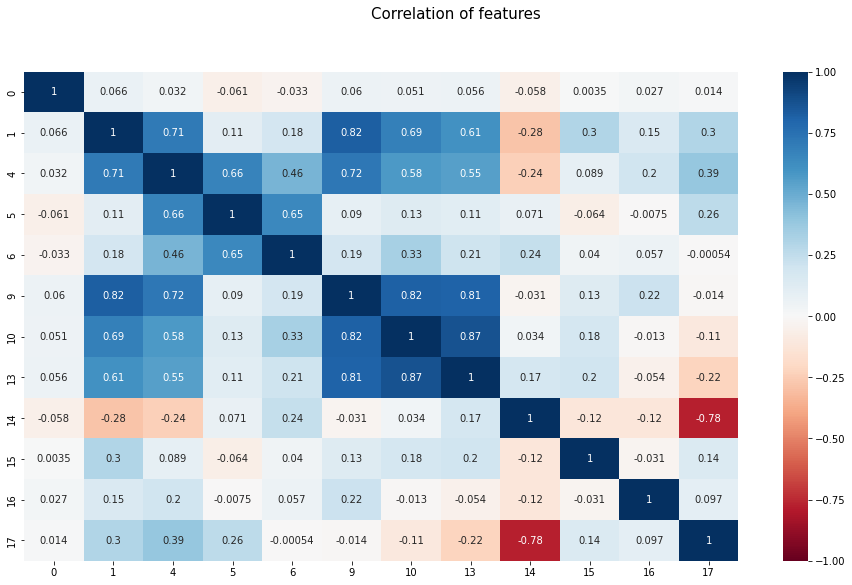

In [112]:
correlation(X_train_dropped)

In [113]:
# Уникальные значения меток
for column in y_train_pd.columns:
    print(f'{y_train_pd[column].unique()} - {len(y_train_pd[column].unique())}')

['saab' 'opel' 'van' 'bus'] - 4


In [114]:
# Оценим сбаллансированность выборки (выборка сбаллансирована)

print(y_train_pd[0].value_counts())

saab    149
opel    139
bus     136
van     125
Name: 0, dtype: int64


In [115]:
# Преобразуем категориальные метки в бинарную матрицу
y_train_binary = pd.get_dummies(y_train_pd)
y_test_binary = pd.get_dummies(y_test_pd)
y_train_binary

,0_bus,0_opel,0_saab,0_van
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
544,0,1,0,0
545,1,0,0,0
546,0,0,1,0
547,0,1,0,0


model score on training data: 0.9350157052839754
model score on testing data: 0.5458269982927682


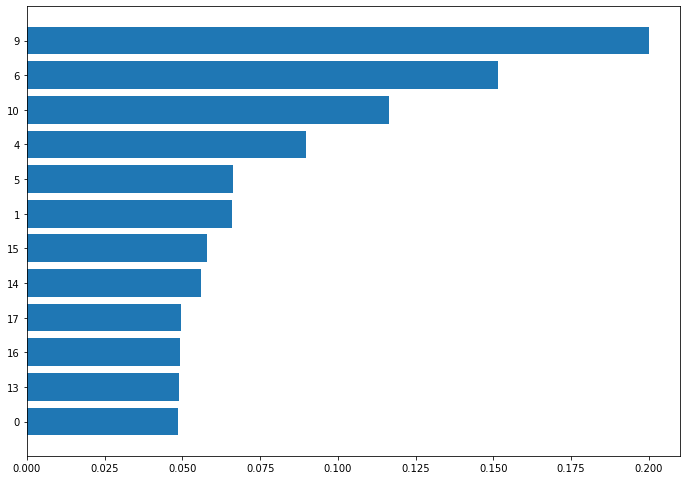

In [116]:
from sklearn.ensemble import RandomForestRegressor

# Значимость фичей с дропом
model1 = RandomForestRegressor()

model1.fit(X_train_dropped, y_train_binary)

print(f'model score on training data: {model1.score(X_train_dropped, y_train_binary)}')
print(f'model score on testing data: {model1.score(X_test_dropped, y_test_binary)}')

importances = model1.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train_dropped.columns)[indices])

model score on training data: 0.9385797077591169
model score on testing data: 0.5563397740624565


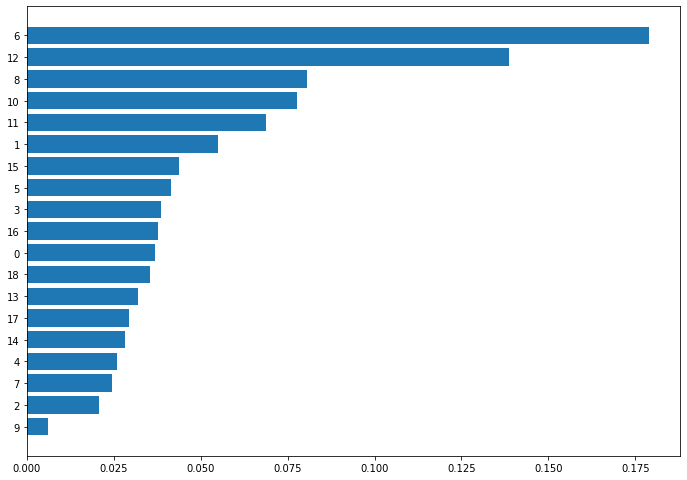

In [117]:
# Значимость фичей без дропа
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()

model2.fit(X_train_pd, y_train_binary)

print(f'model score on training data: {model2.score(X_train_pd, y_train_binary)}')
print(f'model score on testing data: {model2.score(X_test_pd, y_test_binary)}')

importances = model2.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train_pd.columns)[indices])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [118]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import scikitplot

In [119]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

In [120]:
param_grid = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'solver': ['saga'], 
    'multi_class': ['multinomial'],
    'max_iter': [500],
    #'C': np.arange(1e-3, 1e-2, 1e-4),
    'C': np.arange(1e-3, 5e-3, 1e-4),
    'tol' : [1e-3]
}
model = LR()

gsc = GridSearchCV(model, param_grid, cv=kf, n_jobs=-1)
gsc.fit(X_train_dropped, y_train_pd)
print(gsc.best_params_)

{'C': 0.004700000000000002, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}


              precision    recall  f1-score   support

         bus       0.67      0.70      0.68        82
        opel       0.52      0.45      0.48        73
        saab       0.44      0.40      0.42        68
         van       0.73      0.85      0.79        74

    accuracy                           0.61       297
   macro avg       0.59      0.60      0.59       297
weighted avg       0.59      0.61      0.60       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

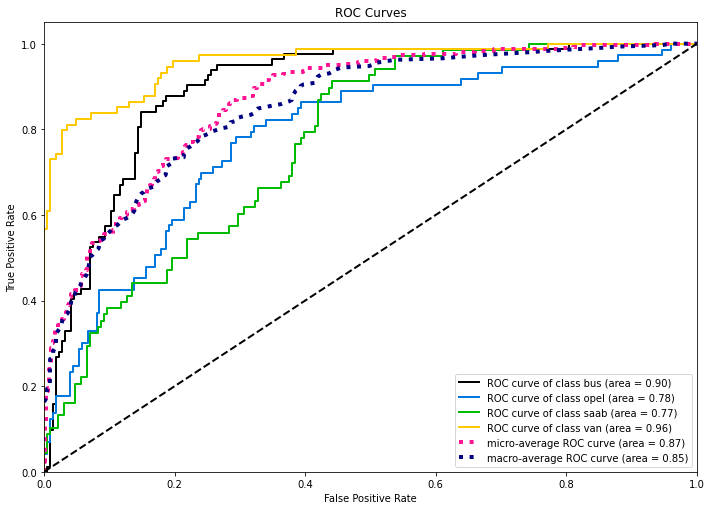

In [121]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
#!pip install scikit-plot

model_LR = LR(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.0047, penalty='l2')
model_LR.fit(X_train_dropped, y_train_pd)
y_hat = model_LR.predict(X_test_dropped)
probs = model_LR.predict_proba(X_test_dropped)
print(classification_report(y_test_pd, y_hat))
scikitplot.metrics.plot_roc(y_test_pd, probs)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [122]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [123]:
scaler = preprocessing.StandardScaler().fit(X_train_dropped)

In [124]:
X_train_dropped_scaled = scaler.transform(X_train_dropped)
X_test_dropped_scaled = scaler.transform(X_test_dropped)

{'pca__n_components': 11, 'pca__power_iteration_normalizer': 'auto', 'pca__svd_solver': 'auto'}


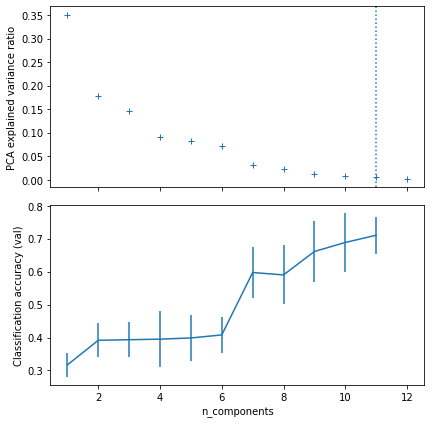

In [125]:
# Подбираем параметры для PCA
pca = PCA()
model_LR_on_PCA = LR()

pipe = Pipeline(steps=[("pca", pca), ("logistic", model_LR_on_PCA)])
param_grid = {
    'pca__n_components': range(1, 12), 
    'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized'], 
    'pca__power_iteration_normalizer': ['auto', 'QR', 'LU', 'none']
}

gsc = GridSearchCV(pipe, param_grid, cv=kf, n_jobs=-1)
gsc.fit(X_train_dropped_scaled, y_train_pd)
print(gsc.best_params_)


pca.fit(X_train_dropped_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")
ax0.axvline(
    gsc.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
results = pd.DataFrame(gsc.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.tight_layout()

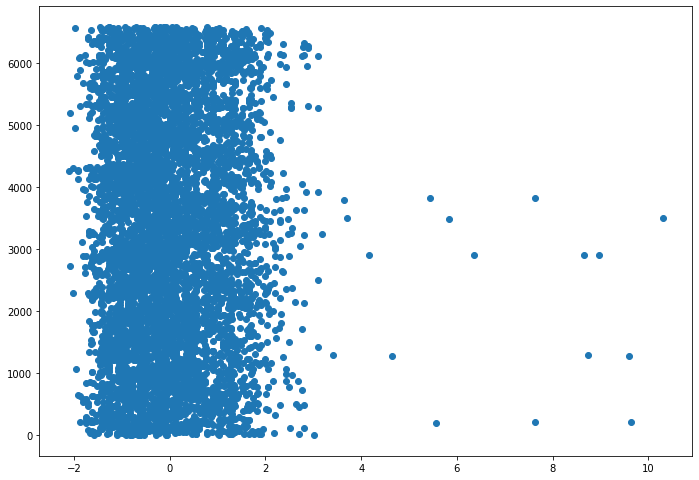

In [126]:
plt.scatter(X_train_dropped_scaled, range(X_train_dropped_scaled.shape[0] * X_train_dropped_scaled.shape[1]))

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [127]:
pca = PCA(n_components=11, power_iteration_normalizer='auto', svd_solver='auto')
pca.fit(X_train_dropped_scaled, y_train_pd)
X_new_train = pca.transform(X_train_dropped_scaled)
X_new_test = pca.transform(X_test_dropped_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [160]:
param_grid = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'solver': ['saga'], 
    'multi_class': ['multinomial'],
    'C': np.arange(1e-1, 1, 1e-1),
    'tol' : [1e-3],
    'max_iter': np.arange(200, 700, 50)
}
model = LR()

gsc = GridSearchCV(model, param_grid, cv=kf, n_jobs=-1)
gsc.fit(X_new_train, y_train_pd)
print(gsc.best_params_)

{'C': 0.30000000000000004, 'max_iter': 200, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}


In [167]:
# Preparing a model
# Параметры, подобранные из предыдущих прогонок подходят лучше
model_LR_on_PCA = LR(multi_class='multinomial', solver='saga', tol=1e-3, C=0.67, penalty='l2', max_iter=200)
model_LR_on_PCA.fit(X_new_train, y_train)

LogisticRegression(C=0.67, max_iter=200, multi_class='multinomial',
                   solver='saga', tol=0.001)

              precision    recall  f1-score   support

         bus       0.86      0.87      0.86        82
        opel       0.61      0.58      0.59        73
        saab       0.57      0.56      0.56        68
         van       0.88      0.93      0.91        74

    accuracy                           0.74       297
   macro avg       0.73      0.73      0.73       297
weighted avg       0.74      0.74      0.74       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

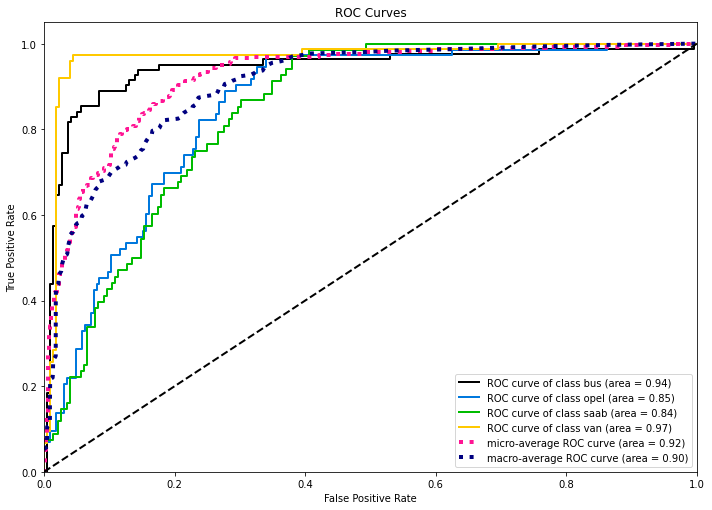

In [168]:
# Predicting and drawing graph and metrics
y_hat_pca = model_LR_on_PCA.predict(X_new_test)
print(classification_report(y_test_pd, y_hat_pca))
probs = model_LR_on_PCA.predict_proba(X_new_test)
#print(y_test, y_hat)
scikitplot.metrics.plot_roc(y_test_pd, probs)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
params ={'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': range(1, 10),
        'splitter':['best', 'random']
        }
model = DecisionTreeClassifier()

gs = GridSearchCV(model, params, cv=kf, n_jobs=-1)
gs.fit(X_new_train, y_train_pd)

gs.best_params_

{'criterion': 'log_loss', 'max_depth': 7, 'splitter': 'best'}

              precision    recall  f1-score   support

         bus       0.86      0.83      0.84        82
        opel       0.47      0.55      0.50        73
        saab       0.42      0.40      0.41        68
         van       0.84      0.76      0.79        74

    accuracy                           0.64       297
   macro avg       0.64      0.63      0.64       297
weighted avg       0.66      0.64      0.65       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

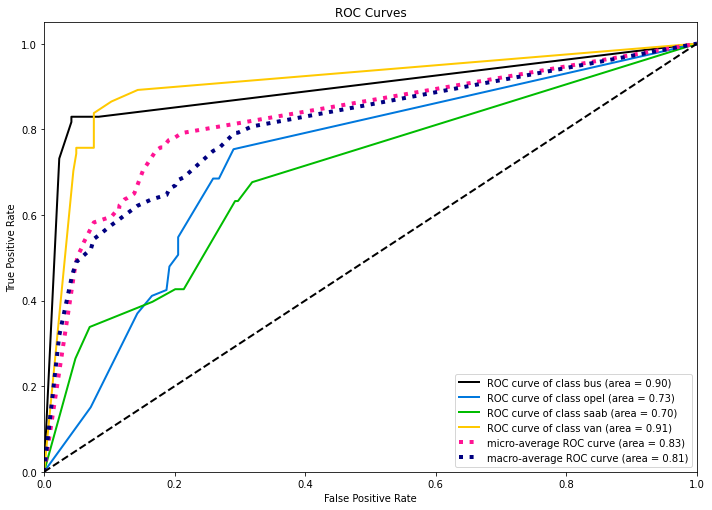

In [202]:
model = DecisionTreeClassifier(max_depth=7, criterion='log_loss', splitter='best')
model.fit(X_new_train, y_train)

y_hat_tree = model.predict(X_new_test)
print(classification_report(y_test_pd, y_hat_tree))
probs = model.predict_proba(X_new_test)
#print(y_test, y_hat)
scikitplot.metrics.plot_roc(y_test_pd, probs)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [203]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [204]:
from numpy import mean
from numpy import std

In [205]:
num_algos = [N for N in range(2, 101, 5)]
num_algos.append(100)
models = dict()
b_model1 = DecisionTreeClassifier(max_depth=7, criterion='log_loss', splitter='best')
b_model2 = LR(multi_class='multinomial', solver='saga', tol=1e-3, C=0.67, penalty='l2', max_iter=200)

num_of_est: 2 mean_acc: 0.615925925925926 f1_mean: 0.6029121272730654
num_of_est: 7 mean_acc: 0.6495117845117845 f1_mean: 0.6492052470260476
num_of_est: 12 mean_acc: 0.6643658810325477 f1_mean: 0.6664525291670406
num_of_est: 17 mean_acc: 0.6727356902356902 f1_mean: 0.6793547994962573
num_of_est: 22 mean_acc: 0.6810033670033669 f1_mean: 0.6860466283305595
num_of_est: 27 mean_acc: 0.6853086419753087 f1_mean: 0.6905742438071816
num_of_est: 32 mean_acc: 0.6902020202020202 f1_mean: 0.6948389594790089
num_of_est: 37 mean_acc: 0.6922937710437711 f1_mean: 0.6987495546215117
num_of_est: 42 mean_acc: 0.6947250280583614 f1_mean: 0.7006774907887349
num_of_est: 47 mean_acc: 0.6952121212121211 f1_mean: 0.7006357368656926
num_of_est: 52 mean_acc: 0.6957698194061831 f1_mean: 0.7029101136877818
num_of_est: 57 mean_acc: 0.6957800224466891 f1_mean: 0.7030437086956759
num_of_est: 62 mean_acc: 0.6964905464905465 f1_mean: 0.7045625222741556
num_of_est: 67 mean_acc: 0.6989177489177489 f1_mean: 0.704964275191

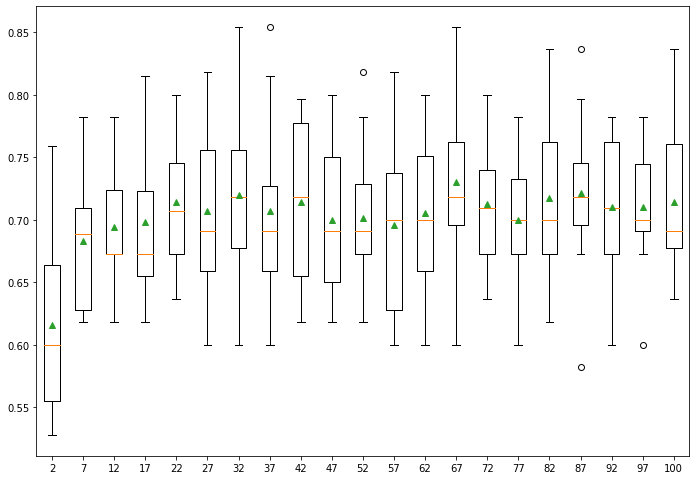

In [206]:
for n in num_algos:
    models[str(n)] = BaggingClassifier(base_estimator=b_model1, n_estimators=n)


accs, f1s, names = list(), list(), list()
for name, model in models.items():
    # evaluate the model
    #model.fit(X_new_train, y_train)
    #y_pred = model.predict(X_new_test)
    scores = cross_val_score(model, X_new_train, y_train_pd, scoring='accuracy', cv=kf, n_jobs=-1)
    f1 = cross_val_score(model, X_new_train, y_train_pd, scoring=make_scorer(f1_score, average='macro'), cv=kf, n_jobs=-1)
    # store the results
    f1s.append(f1)
    accs.append(scores)
    
    #results.append([accuracy, f1])
    names.append(name)
    # summarize the performance along the way
    print('num_of_est:', name, 'mean_acc:', mean(accs), 'f1_mean:', mean(f1s))
    
# plot model performance for comparison
plt.boxplot(accs, labels=names, showmeans=True)
plt.show()

In [207]:
np.array(f1s).shape

(21, 10)

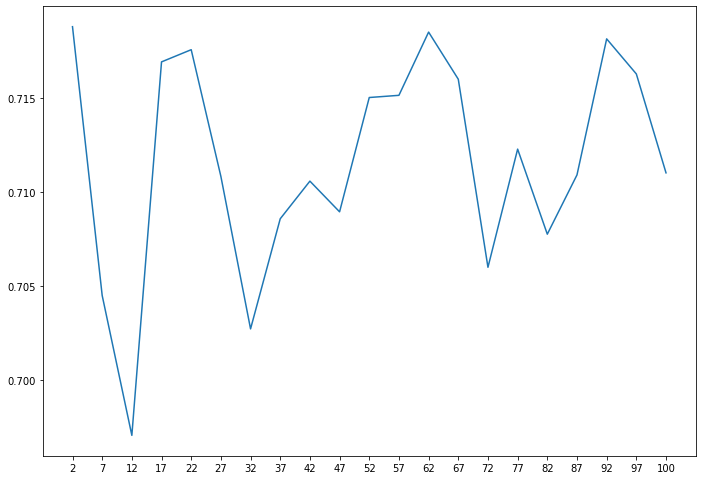

In [230]:
plt.plot(names, mean(f1s, axis=1))
plt.show()
# на 37 выходит на полочку

num_of_est: 2 mean_acc: 0.7231986531986532 f1_mean: 0.7187971756096092
num_of_est: 7 mean_acc: 0.7104377104377104 f1_mean: 0.7116530679099717
num_of_est: 12 mean_acc: 0.7122446689113356 f1_mean: 0.7067922616657072
num_of_est: 17 mean_acc: 0.7131481481481481 f1_mean: 0.7093255383795538
num_of_est: 22 mean_acc: 0.7129629629629629 f1_mean: 0.7109750998665626
num_of_est: 27 mean_acc: 0.7125308641975308 f1_mean: 0.7109522365923923
num_of_est: 32 mean_acc: 0.7132659932659932 f1_mean: 0.7097778288302162
num_of_est: 37 mean_acc: 0.71381734006734 f1_mean: 0.7096286715790063
num_of_est: 42 mean_acc: 0.7142461653572765 f1_mean: 0.7097350748938531
num_of_est: 47 mean_acc: 0.7144040404040406 f1_mean: 0.7096570327810349
num_of_est: 52 mean_acc: 0.7147015610651976 f1_mean: 0.7101456023934205
num_of_est: 57 mean_acc: 0.7141891133557802 f1_mean: 0.7105624339444762
num_of_est: 62 mean_acc: 0.7145972545972548 f1_mean: 0.7111737489039065
num_of_est: 67 mean_acc: 0.7146873496873497 f1_mean: 0.7115187716152

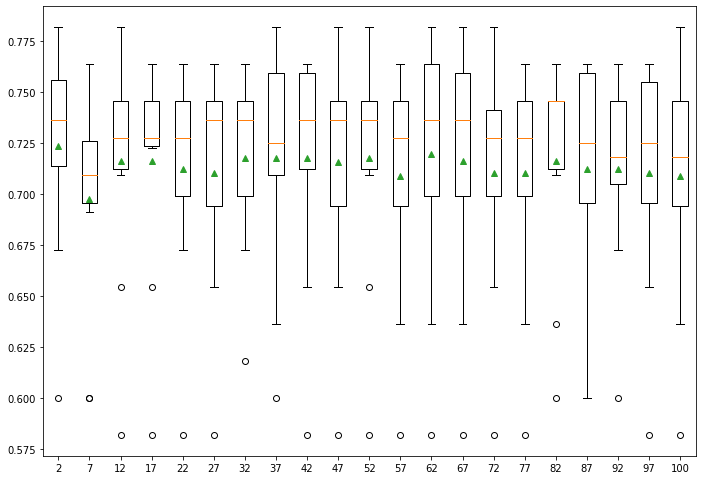

In [209]:
models = dict()
for n in num_algos:
    models[str(n)] = BaggingClassifier(base_estimator=b_model2, n_estimators=n)

accs, f1s, names = list(), list(), list()
for name, model in models.items():
    # evaluate the model
    #model.fit(X_new_train, y_train)
    #y_pred = model.predict(X_new_test)
    scores = cross_val_score(model, X_new_train, y_train_pd, scoring='accuracy', cv=10, n_jobs=-1)
    f1 = cross_val_score(model, X_new_train, y_train_pd, scoring=make_scorer(f1_score, average='macro'), cv=10, n_jobs=-1)
    # store the results
    f1s.append(f1)
    accs.append(scores)
    
    #results.append([accuracy, f1])
    names.append(name)
    # summarize the performance along the way
    print('num_of_est:', name, 'mean_acc:', mean(accs), 'f1_mean:', mean(f1s))
    
# plot model performance for comparison
plt.boxplot(accs, labels=names, showmeans=True)
plt.show()

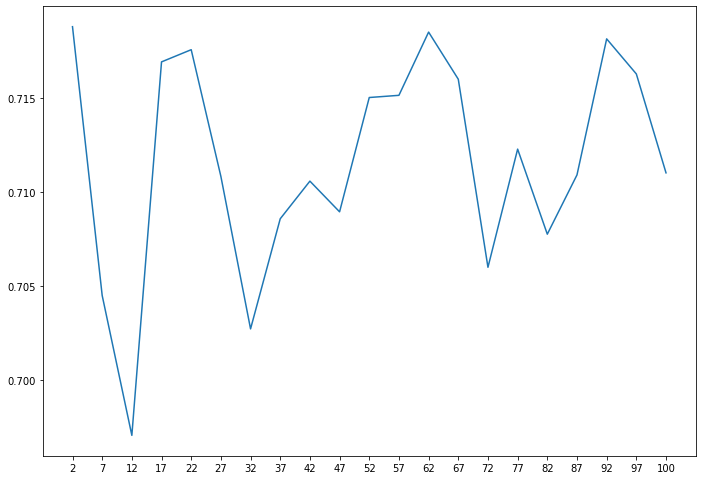

In [210]:
plt.plot(names, mean(f1s, axis=1))
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [211]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

In [212]:
params ={'criterion': ['gini', 'entropy', 'log_loss'],
        'n_estimators': num_algos,
        'max_depth': range(5, 10),
        }
model = RandomForestClassifier()

gs = GridSearchCV(model, params, n_jobs=-1, cv=kf)
gs.fit(X_new_train, y_train_pd)

gs.best_params_
# n_estimators = количеству decision trees в bagging

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 37}

              precision    recall  f1-score   support

         bus       0.94      0.93      0.93        82
        opel       0.58      0.49      0.53        73
        saab       0.51      0.56      0.53        68
         van       0.85      0.91      0.88        74

    accuracy                           0.73       297
   macro avg       0.72      0.72      0.72       297
weighted avg       0.73      0.73      0.73       297



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

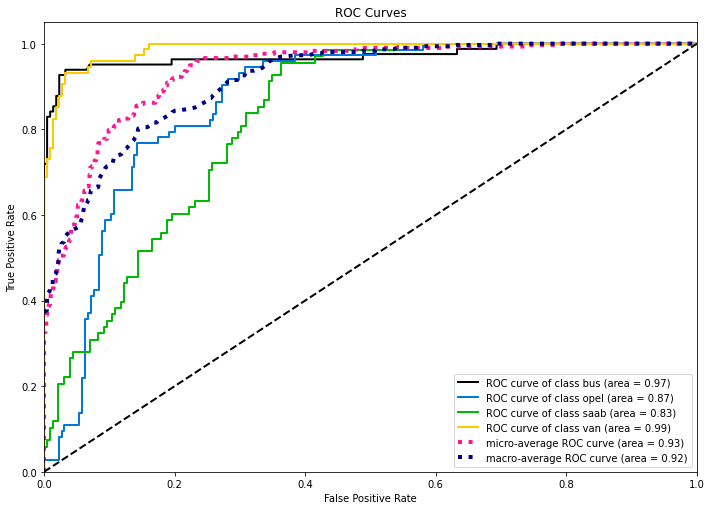

In [231]:
model = RandomForestClassifier(max_depth=9, criterion='gini', n_estimators=37)
model.fit(X_new_train, y_train_pd)

y_hat_forest = model.predict(X_new_test)
print(classification_report(y_test_pd, y_hat_forest))
probs = model.predict_proba(X_new_test)
#print(y_test, y_hat)
scikitplot.metrics.plot_roc(y_test_pd, probs)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [251]:
from sklearn.metrics import accuracy_score

In [280]:
# YOUR CODE HERE
splits = []
for i in range(1, 10):
    res = X_new_train.shape[0] // 10 * i
    splits.append(res)

splits.append(X_new_train.shape[0] + 1)

optim_lr = LR(multi_class='multinomial', solver='saga', tol=1e-3, C=0.67, penalty='l2', max_iter=350)
optim_dt = DecisionTreeClassifier(max_depth=8, criterion='gini', splitter='best')
optim_rf = RandomForestClassifier(max_depth=8, criterion='entropy', n_estimators=62)

accs, f1s = list(), list()

for i, split in enumerate(splits):
    
    optim_lr.fit(X_new_train[0:split], y_train[0:split])
    optim_dt.fit(X_new_train[0:split], y_train[0:split])
    optim_rf.fit(X_new_train[0:split], y_train[0:split])
    
    y_lr = optim_lr.predict(X_new_test)
    y_dt = optim_dt.predict(X_new_test)
    y_rf = optim_rf.predict(X_new_test)
    
    accs.append([accuracy_score(y_test_pd, y_lr), accuracy_score(y_test_pd, y_dt), accuracy_score(y_test_pd, y_rf)])
    f1s.append([f1_score(y_test_pd, y_lr, average='macro'), f1_score(y_test_pd, y_dt, average='macro'), f1_score(y_test_pd, y_rf, average='macro')])

    #print('______________________________', i + 1, ' split________________________________', sep='')
    #print('Log_Reg:\n', classification_report(y_test_pd, y_lr))
    #print('Dec_Tree:\n', classification_report(y_test_pd, y_dt))
    #print('Ran_For:\n', classification_report(y_test_pd, y_rf))
    #print('_____________________________________________________________________\n')
    
    
    print('______________________________', i + 1, ' split________________________________', sep='')
    print('Log_Reg:\n', 'accuracy: ', accuracy_score(y_test_pd, y_lr), '\nf1: ', f1_score(y_test_pd, y_lr, average='macro'), '\n', sep='')
    print('Dec_Tree:\n', 'accuracy: ', accuracy_score(y_test_pd, y_dt), '\nf1: ', f1_score(y_test_pd, y_dt, average='macro'), '\n', sep='')
    print('Ran_For:\n', 'accuracy: ', accuracy_score(y_test_pd, y_rf), '\nf1: ', f1_score(y_test_pd, y_rf, average='macro'), '\n', sep='')
    print('_____________________________________________________________________\n')

______________________________1 split________________________________
Log_Reg:
accuracy: 0.6161616161616161
f1: 0.6057487652507539

Dec_Tree:
accuracy: 0.5286195286195287
f1: 0.5228632861083192

Ran_For:
accuracy: 0.6498316498316499
f1: 0.641851587695361

_____________________________________________________________________

______________________________2 split________________________________
Log_Reg:
accuracy: 0.6464646464646465
f1: 0.6249356834641955

Dec_Tree:
accuracy: 0.5420875420875421
f1: 0.5229965176822144

Ran_For:
accuracy: 0.6262626262626263
f1: 0.609098610608634

_____________________________________________________________________

______________________________3 split________________________________
Log_Reg:
accuracy: 0.6666666666666666
f1: 0.6440832466887628

Dec_Tree:
accuracy: 0.6296296296296297
f1: 0.6239880995874673

Ran_For:
accuracy: 0.7003367003367004
f1: 0.6901802260934025

_____________________________________________________________________

__________________

In [281]:
accs = np.array(accs)
f1s = np.array(f1s)

In [282]:
#accs = np.flip(accs)
#f1s = np.flip(f1s)

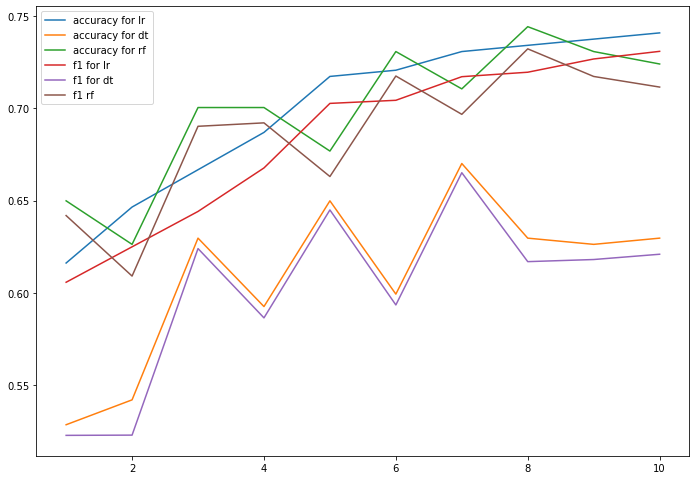

In [283]:
plt.plot(range(1, 11), accs[:, 0], label = "accuracy for lr")
plt.plot(range(1, 11), accs[:, 1], label = "accuracy for dt")
plt.plot(range(1, 11), accs[:, 2], label = "accuracy for rf")

plt.plot(range(1, 11), f1s[:, 0], label = "f1 for lr")
plt.plot(range(1, 11), f1s[:, 1], label = "f1 for dt")
plt.plot(range(1, 11), f1s[:, 2], label = "f1 rf")
plt.legend()
plt.show()

## Вывод: с увеличением размера Train выборки f1_score и accuracy_score растет